In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
df_links = pd.read_csv('csv/links.csv')
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [3]:
df_links=df_links.dropna()
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
df_movies = pd.read_csv('csv/movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
df_ratings = pd.read_csv('csv/ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
df_tags = pd.read_csv('csv/tags.csv')
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [7]:
header = {
    'User-Agent': 'Chrome 108.0.5359.125',
    'Accept-Language': 'es'
}

In [8]:
'''
columnaSinopsis=[]
#for idPeli in df_links['tmdbId'].head(10):
for idPeli in df_links['tmdbId']:
    print(int(idPeli))
    try:
        url = "https://www.themoviedb.org/movie/"+str(int(idPeli))
        page = requests.get(url,headers=header)
        soup = BeautifulSoup (page.content, 'html.parser')
        sinopsis = soup.find(class_="overview")
        sinopsis = str(sinopsis.text)
        #sinopsis = str(sinopsis)
        #print(sinopsis)
        columnaSinopsis.append(sinopsis)
    except:
        columnaSinopsis.append("Sin Informacion")
columnaSinopsis
'''

'\ncolumnaSinopsis=[]\n#for idPeli in df_links[\'tmdbId\'].head(10):\nfor idPeli in df_links[\'tmdbId\']:\n    print(int(idPeli))\n    try:\n        url = "https://www.themoviedb.org/movie/"+str(int(idPeli))\n        page = requests.get(url,headers=header)\n        soup = BeautifulSoup (page.content, \'html.parser\')\n        sinopsis = soup.find(class_="overview")\n        sinopsis = str(sinopsis.text)\n        #sinopsis = str(sinopsis)\n        #print(sinopsis)\n        columnaSinopsis.append(sinopsis)\n    except:\n        columnaSinopsis.append("Sin Informacion")\ncolumnaSinopsis\n'

In [ ]:
pip install scikit-surprise


# Motor de recomendacion en base a la valoracion de los demas usuarios

In [9]:
import surprise
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity


<AxesSubplot:xlabel='rating', ylabel='count'>

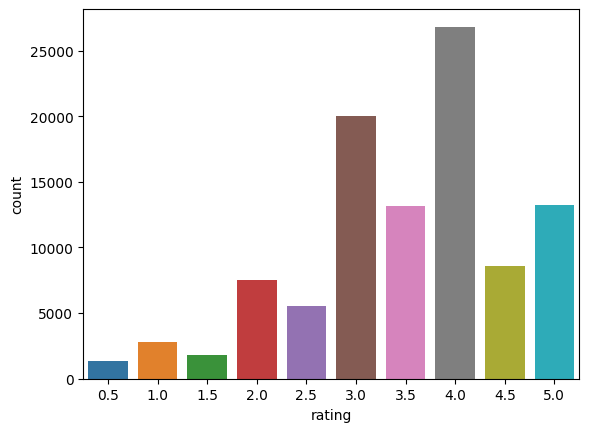

In [10]:
sns.countplot(x='rating', data=df_ratings)

In [11]:
#fusionamos en un df el de rating y el de muvies y seleccionamos solo las columnas que queremos con [[]]
df_movies_ratings = df_ratings.merge(df_movies)[['userId','movieId','title', 'rating','genres']]
df_movies_ratings

,userId,movieId,title,rating,genres
0,1,1,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy
1,5,1,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy
2,7,1,Toy Story (1995),4.5,Adventure|Animation|Children|Comedy|Fantasy
3,15,1,Toy Story (1995),2.5,Adventure|Animation|Children|Comedy|Fantasy
4,17,1,Toy Story (1995),4.5,Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,Bloodmoon (1997),2.5,Action|Thriller
100832,610,160527,Sympathy for the Underdog (1971),4.5,Action|Crime|Drama
100833,610,160836,Hazard (2005),3.0,Action|Drama|Thriller
100834,610,163937,Blair Witch (2016),3.5,Horror|Thriller


In [12]:
df_movies_ratings[df_movies_ratings['title'].str.contains('Star Wa')]

,userId,movieId,title,rating,genres
1568,1,260,Star Wars: Episode IV - A New Hope (1977),5.0,Action|Adventure|Sci-Fi
1569,4,260,Star Wars: Episode IV - A New Hope (1977),5.0,Action|Adventure|Sci-Fi
1570,7,260,Star Wars: Episode IV - A New Hope (1977),5.0,Action|Adventure|Sci-Fi
1571,15,260,Star Wars: Episode IV - A New Hope (1977),5.0,Action|Adventure|Sci-Fi
1572,16,260,Star Wars: Episode IV - A New Hope (1977),3.0,Action|Adventure|Sci-Fi
...,...,...,...,...,...
81537,414,187595,Solo: A Star Wars Story (2018),3.5,Action|Adventure|Children|Sci-Fi
81538,514,187595,Solo: A Star Wars Story (2018),3.0,Action|Adventure|Children|Sci-Fi
81539,586,187595,Solo: A Star Wars Story (2018),5.0,Action|Adventure|Children|Sci-Fi
99655,514,135216,The Star Wars Holiday Special (1978),0.5,Adventure|Children|Comedy|Sci-Fi


In [13]:
ratings_table = df_movies_ratings.pivot_table(index='userId', columns='title', values='rating')
#para cambiar los NAN por 0:
ratings_table.fillna(0, inplace=True)
ratings_table

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [14]:
sparse_rating = sp.sparse.csr_matrix(ratings_table)

In [15]:
sparse_rating

<610x9719 sparse matrix of type '<class 'numpy.float64'>'
	with 100832 stored elements in Compressed Sparse Row format>

In [16]:
similitud_usuarios = cosine_similarity(sparse_rating)
similitud_usuarios

array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])

In [17]:
#se hace con la transpuesta de la matriz creada anteriormente
similitud_movies = cosine_similarity(sparse_rating.T)
similitud_movies 

array([[1.        , 0.        , 0.        , ..., 0.32732684, 0.        ,
        0.        ],
       [0.        , 1.        , 0.70710678, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.70710678, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32732684, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [18]:
df_similitud_usuarios = pd.DataFrame(similitud_usuarios, index=ratings_table.index, columns=ratings_table.index)
df_similitud_usuarios

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
607,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
608,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055


In [19]:
df_similitud_movies = pd.DataFrame(similitud_movies, index=ratings_table.columns, columns=ratings_table.columns)
df_similitud_movies

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.141653,0.000000,...,0.000000,0.342055,0.543305,0.707107,0.0,0.000000,0.139431,0.327327,0.000000,0.0
'Hellboy': The Seeds of Creation (2004),0.000000,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
'Round Midnight (1986),0.000000,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
'Salem's Lot (2004),0.000000,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
'Til There Was You (1997),0.000000,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.211467,0.216295,0.097935,0.132489,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.192259,0.000000,0.170341,0.0
xXx (2002),0.139431,0.000000,0.000000,0.000000,0.000000,0.0,0.089634,0.000000,0.276512,0.019862,...,0.069716,0.305535,0.173151,0.246482,0.0,0.192259,1.000000,0.270034,0.100396,0.0
xXx: State of the Union (2005),0.327327,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.156764,0.000000,...,0.000000,0.382543,0.177838,0.231455,0.0,0.000000,0.270034,1.000000,0.000000,0.0


In [31]:
import ast

In [39]:
df_similitud_movies["Who's Harry Crumb? (1989)"].sort_values(ascending=False)

title
Who's Harry Crumb? (1989)                      1.000000
Air Up There, The (1994)                       0.728869
Funny Farm (1988)                              0.719641
Mr. Wonderful (1993)                           0.693375
Blind Date (1987)                              0.684257
                                                 ...   
Highway 61 (1991)                              0.000000
Highlander: The Search for Vengeance (2007)    0.000000
Higher Learning (1995)                         0.000000
High and Low (Tengoku to jigoku) (1963)        0.000000
À nous la liberté (Freedom for Us) (1931)      0.000000
Name: Who's Harry Crumb? (1989), Length: 9719, dtype: float64

In [40]:
def peliculasSimilares(title, n_similares):
    #le sumamos uno porque la primera siempre es la propia pelicula y nos la saltamos
    n_similares+=1
    contador = 1
    print('Peliculas similares a ' + title + ':')
    print()
    for movie in df_similitud_movies[title].sort_values(ascending=False).index[1:n_similares]:
        print(str(contador) + ' - ' + str(movie))
        contador+=1
    
    

In [41]:
peliculasSimilares("Who's Harry Crumb? (1989)", 10)

Peliculas similares a Who's Harry Crumb? (1989):

1 - Air Up There, The (1994)
2 - Funny Farm (1988)
3 - Mr. Wonderful (1993)
4 - Blind Date (1987)
5 - Armed and Dangerous (1986)
6 - Krippendorf's Tribe (1998)
7 - Amos & Andrew (1993)
8 - Cowboy Way, The (1994)
9 - Toxic Avenger, Part II, The (1989)
10 - Toxic Avenger Part III: The Last Temptation of Toxie, The (1989)


In [28]:
###################otro

In [ ]:
###################otro

In [ ]:
###################otro

In [ ]:
###################otro

In [ ]:
###################otro

In [ ]:
###################otro

In [ ]:
###################otro

In [ ]:
###################otro

In [ ]:
###################otro

In [ ]:
#df_movies_ratings['genres']

In [42]:
genres = list(set([genre for genres in df_movies["genres"].str.split("|") for genre in genres]))
genres

['Film-Noir',
 'Horror',
 'Crime',
 'Adventure',
 'Documentary',
 'Action',
 'Drama',
 'Animation',
 'Mystery',
 'Romance',
 'Musical',
 'Sci-Fi',
 'Western',
 'Thriller',
 '(no genres listed)',
 'War',
 'Fantasy',
 'Comedy',
 'IMAX',
 'Children']

In [43]:
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [44]:
genre_matrix = []
for index, row in df_movies.iterrows():
    genre_list = row["genres"].split("|")
    genre_vector = [1 if genre in genre_list else 0 for genre in genres]
    genre_matrix.append(genre_vector)

In [45]:
genre_matrix = pd.DataFrame(genre_matrix, columns=genres)
genre_matrix

,Film-Noir,Horror,Crime,Adventure,Documentary,Action,Drama,Animation,Mystery,Romance,Musical,Sci-Fi,Western,Thriller,(no genres listed),War,Fantasy,Comedy,IMAX,Children
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
9738,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
9739,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9740,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
movie_list[0][0]

NameError: name 'movie_list' is not defined

In [239]:
def peliculasSimilaresPorGenero(title, n_similares):
    contador = 1
    selected_movie = df_movies[df_movies["title"] == title]
    selected_movie_index = selected_movie.index[0]
    #sacamos las similitudes de los generos
    similarities = cosine_similarity(genre_matrix[selected_movie_index:selected_movie_index+1], genre_matrix).flatten()
    #las metemos en una tupla y las ordenamos de mayor a menor 
    movie_list = [(index, similarity) for index, similarity in enumerate(similarities)]
    movie_list.sort(key=lambda x: x[1], reverse=True)
    
    print('Peliculas similares a ' + title + ':')
    print()
    #la bandera nos sirve para saltarnos la propia peli que buscamos
    #siempre esta a false y si nos encontramos la peli que estamos buscando la activamos a True
    #si esta en True al finalizar el bucle significa que ha saltado el titulo que buscabamos para no repetirse a si mismo 
    #y por lo tanto hay que añadir uno mas para llegar al numero deseado por el usuario
    bandera=False
    for movie in movie_list[0:n_similares]:
        if(title != df_movies.iloc[movie[0]]["title"]):
            print(str(contador)+' - ' +df_movies.iloc[movie[0]]["title"])
            contador+=1
        else:
            bandera=True
    if(bandera):
        #print('bandera')
        mov=movie_list[n_similares][0]
        print(str(contador)+' - ' +df_movies.iloc[mov]["title"])

In [247]:
peliculasSimilaresPorGenero("Who's Harry Crumb? (1989)"", 10)

Peliculas similares a Star Wars: Episode IV - A New Hope (1977):

1 - Waterworld (1995)
2 - Stargate (1994)
3 - Demolition Man (1993)
4 - Star Wars: Episode V - The Empire Strikes Back (1980)
5 - Star Wars: Episode VI - Return of the Jedi (1983)
6 - Star Trek III: The Search for Spock (1984)
7 - Lost in Space (1998)
8 - Rocketeer, The (1991)
9 - Tron (1982)
bandera
10 - Six-String Samurai (1998)
